In [2]:
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%precision 4
%matplotlib inline
util.scale_plot_size(1.5)

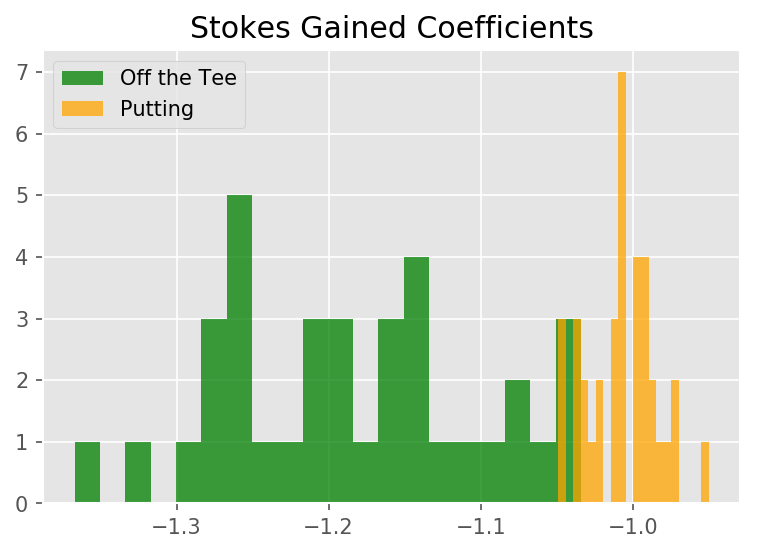

In [16]:
year = 2014
tag = 'sg-200'
sqlTxt = '''
select permanent_tournament_id, (b_offset).mean as offset, (b_tee).mean as tee, 
       (b_approach).mean as approach, (b_around).mean as around, 
       (b_putting).mean as putting 
    from stan_sg_tournaments
    where year = %s
      and tag = %s;
'''
t_df = util.pd_from_sql(sqlTxt, [year, tag])
plt.hist(t_df['tee'].as_matrix().tolist(), 20, facecolor='green', alpha=0.75, label='Off the Tee')
plt.hist(t_df['putting'].as_matrix().tolist(), 20, facecolor='orange', alpha=0.75,  label='Putting')
plt.legend(loc='upper left')
foo = plt.title('Stokes Gained Coefficients')

In [21]:
sg_map = {}
for row in t_df.as_matrix():
    sg_map[int(row[0])] = row

In [19]:
year = 2014
tag = 'sg-200'
limit = 200
sqlTxt = '''
select * from (select year, player_id, row_number from rank_view where year = %s  limit %s) r 
    join scores_view s 
    using (player_id, year) order by r.row_number, player_id, year, permanent_tournament_id, round;
'''
p_df = util.pd_from_sql(sqlTxt, [year, limit])
p_df = p_df[(pd.notnull(p_df['sg_approach'])) & (pd.notnull(p_df['sg_around']))]


In [22]:
player_scores = p_df.as_matrix()
player_id = [row[0] for row in player_scores ]
actuals = [row[6] for row in player_scores]
def compute_score(row):
    sg = sg_map[int(row[4])]
    return sg[1] + row[7]*sg[2] + row[8]*sg[3] + row[9]*sg[4] + row[10]*sg[5]

estimated = [compute_score(row) for row in player_scores]
comp_df = pd.DataFrame({'player_id': player_id, 'actuals':actuals, 'estimated': estimated})


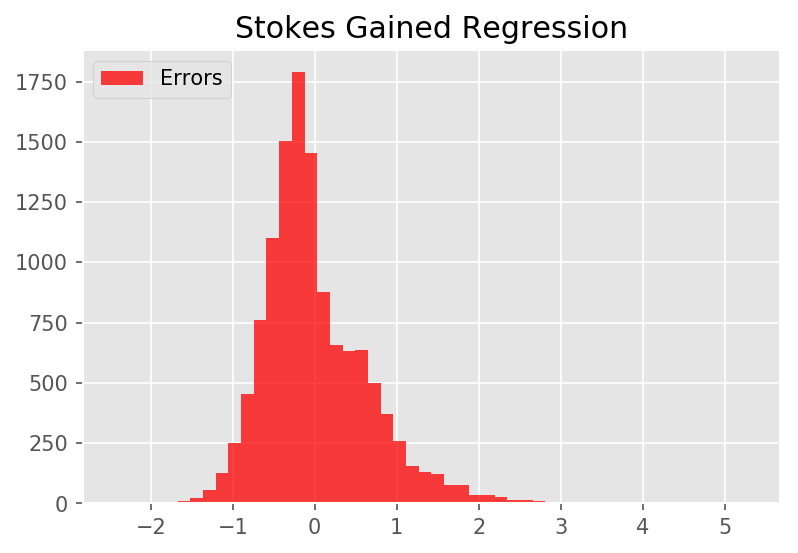

In [26]:
h = [row[0] - row[1] for row in comp_df.as_matrix()]
plt.hist(h, 50, facecolor='red', alpha=0.75,  label='Errors')
plt.legend(loc='upper left')
foo = plt.title('Stokes Gained Regression')


In [22]:
t_df[t_df['permanent_tournament_id'] == 10].as_matrix()[0]

array([ 10.   ,  70.953,  -1.262,  -1.239,  -1.025,  -1.022])